<a href="https://colab.research.google.com/github/Shai-Safran/Projects/blob/main/BEER_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **מידע על בירה**

[בירה בויקיפדיה](https://he.wikipedia.org/wiki/%D7%91%D7%99%D7%A8%D7%94)


[בירה](https://www.zmanamiti.co.il/world-of-alcohol/beer?srsltid=AfmBOooxWKO1RD7-WWVieKlT4XK9TtIvwv9wH6ueZwxUTTACXUyjdn7p)

[סוגי בירה: המדריך המלא מא' עד ת'](https://blend.co.il/on/demandware.store/Sites-Blend-Site/iw_IL/Articles-Article?articleId=Types-of-beer-the-complete-guide-from-A-to-Z)

In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')
# import Packages
!pip install ipywidgets
# !pip install python-pptx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import ipywidgets as widgets
from IPython.display import display, HTML
# import pptx
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression
from itertools import product
# read DataSet
df = pd.read_csv ('/content/drive/MyDrive/database/open-beer-database.csv')


# **כמה ערכים להציג?**

In [11]:
hnum = input('כמה ערכים להציג? (Default is 5): ')
hnum = int(hnum) if hnum else 5

כמה ערכים להציג? (Default is 5): 5


# **מפת מבשלות בירה בעולם**





In [3]:
# Split the "Coordinates" column
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)

# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
# Split the "Coordinates" column
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
df = df.dropna(subset=['Latitude', 'Longitude'])
# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Create a map centered on the mean of your coordinates
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each coordinate
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color='red', icon='beer')
    ).add_to(my_map)

# Save the map
my_map.save('beer_locations.html')

# Create the scatter_mapbox plot
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Name",
    hover_data={'City': True, 'Country': True, 'Brewer': True, 'Latitude': False, 'Longitude': False},
    zoom=3,
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Plotly,
)

# Customize the map style (optional)
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()

<ipython-input-3-d3a1156ce11b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'])
<ipython-input-3-d3a1156ce11b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = pd.to_numeric(df['Longitude'])


# **הצגת מידע על בירות**

In [24]:

# Create a dropdown widget
dropdown = widgets.SelectMultiple(
    options=sorted([str(x) for x in df['Name'].unique().tolist()]),
    description='בחר בירה:',
    disabled=False,
)

# Create an output widget to display results
output = widgets.Output()

def make_clickable(url, brewer):

    if isinstance(url, str) and url.strip() and url not in ['nan', '']:
        return f'<a href="{url}" target="_blank">{brewer}</a>'
    else:
        return str(brewer)

df['Website_Link'] = df.apply(lambda row: make_clickable(row['Website'], row['Brewer']), axis=1)
unique_links = df['Website_Link'].drop_duplicates().tolist()

html_link = '<br>'.join(unique_links)



def search_beer(change):
    global result
    selected_values = change.new
    with output:
        output.clear_output()
        if selected_values:
            result = df[df['Name'].isin(selected_values)][['id','Name','Category', 'Style','Brewer', 'Alcohol By Volume', 'International Bitterness Units', 'Country','City' ,'Website_Link']]  # Include 'Website_Link' in the result
            result['Alcohol By Volume'] = result['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
            result['Alcohol By Volume'] = result['Alcohol By Volume'].astype(str) + '%'
            result = result.sort_values(by=['Name','Alcohol By Volume'])
            # Display the DataFrame with HTML rendering for the 'Website_Link' column
            display(HTML(result.to_html(escape=False, index=False)))
        else:
            # Handle case when no values are selected
            print("בחר לפחות בירה אחת.")

# Observe dropdown changes and call search_beer function
dropdown.observe(search_beer, names='value')

# Display the widgets
display(dropdown, output)

SelectMultiple(description='בחר בירה:', options=('#17 Cream Ale', '#40 Golden Lager', '#42 Cream Ale', '#9', '…

Output()

# **הצגת מידע על מבשלות**

In [23]:

# Create a dropdown widget
dropdown = widgets.SelectMultiple(
    options=sorted([str(x) for x in df['Brewer'].unique().tolist()]),
    description='בחר מבשלת:',
    disabled=False,
)

# Create an output widget to display results
output = widgets.Output()

def make_clickable(url, brewer):

    if isinstance(url, str) and url.strip() and url not in ['nan', '']:
        return f'<a href="{url}" target="_blank">{brewer}</a>'
    else:
        return str(brewer)

df['Website_Link'] = df.apply(lambda row: make_clickable(row['Website'], row['Brewer']), axis=1)
unique_links = df['Website_Link'].drop_duplicates().tolist()

html_link = '<br>'.join(unique_links)

def search_Brewer(change):
    global result
    selected_values = change.new
    with output:
        output.clear_output()
        if selected_values:
            result = df[df['Brewer'].isin(selected_values)][['Brewer', 'Country','City' ,  'Name','Category', 'Style','Alcohol By Volume', 'International Bitterness Units','Website_Link']]  # Include 'Website_Link' in the result
            result['Alcohol By Volume'] = result['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
            result['Alcohol By Volume'] = result['Alcohol By Volume'].astype(str) + '%'
            result = result.sort_values(by=['Brewer','Alcohol By Volume'])
            # Display the DataFrame with HTML rendering for the 'Website_Link' column
            display(HTML(result.to_html(escape=False ,index=False)))
        else:
            # Handle case when no values are selected
            print("בחר לפחות מבשלת אחת.")

# Observe dropdown changes and call search_beer function
dropdown.observe(search_Brewer, names='value')

# Display the widgets

display(dropdown, output)

SelectMultiple(description='בחר מבשלת:', options=('(512) Brewing Company', '21st Amendment Brewery Cafe', '3 F…

Output()

# **סטיסטיקה של הקובץ**

In [6]:
df_stat = df.dropna(subset=['Style', 'Alcohol By Volume'])
num_beers=len(df)
num_beer_Category = df_stat['Category'].nunique()
num_beer_styles = df_stat['Style'].nunique()
num_breweries = df['brewery_id'].nunique()
num_countries = df['Country'].nunique()
max_alcohol_content = df_stat['Alcohol By Volume'].max()
max_alcohol_content = '{:.1f}%'.format(max_alcohol_content)
min_alcohol_content = df_stat['Alcohol By Volume'].min()
min_alcohol_content = '{:.1f}%'.format(min_alcohol_content)

data = {
    'Number of Beers': [num_beers],
    'Number of Countries': [num_countries],
    'Number of Breweries': [num_breweries],
    'Number of Beer Categories': [num_beer_Category],
    'Number of Beer Styles': [num_beer_styles],
    'Max Alcohol Content': [max_alcohol_content],
    'Min Alcohol Content': [min_alcohol_content]
}
stat = pd.DataFrame(data)
styled_stat = stat.style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'font-size': '12pt'
}).hide(axis='index')


display(styled_stat)

Number of Beers,Number of Countries,Number of Breweries,Number of Beer Categories,Number of Beer Styles,Max Alcohol Content,Min Alcohol Content
5746,52,1223,9,61,100.0%,0.0%



# **?כמה מבשלות יש בכל מדינה**

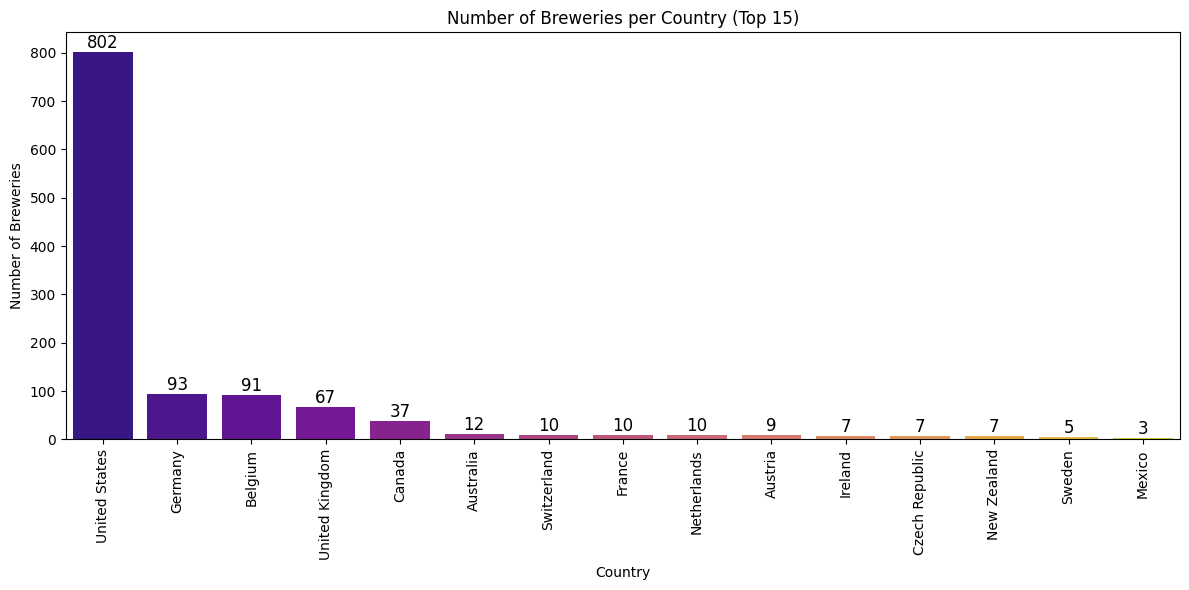

In [7]:
df_brewerys=df.groupby('Country')['brewery_id'].nunique().reset_index()
df_brewerys=df_brewerys.sort_values(by=['brewery_id'],ascending=False).head(hnum)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country', y='brewery_id', data=df_brewerys, hue='Country', palette='plasma', legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title(f'Number of Breweries per Country (Top {hnum})')
plt.xlabel('Country')
plt.ylabel('Number of Breweries')
ax = plt.gca()  # Get the current Axes object
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# **כמות מבשלות לפי ערים**

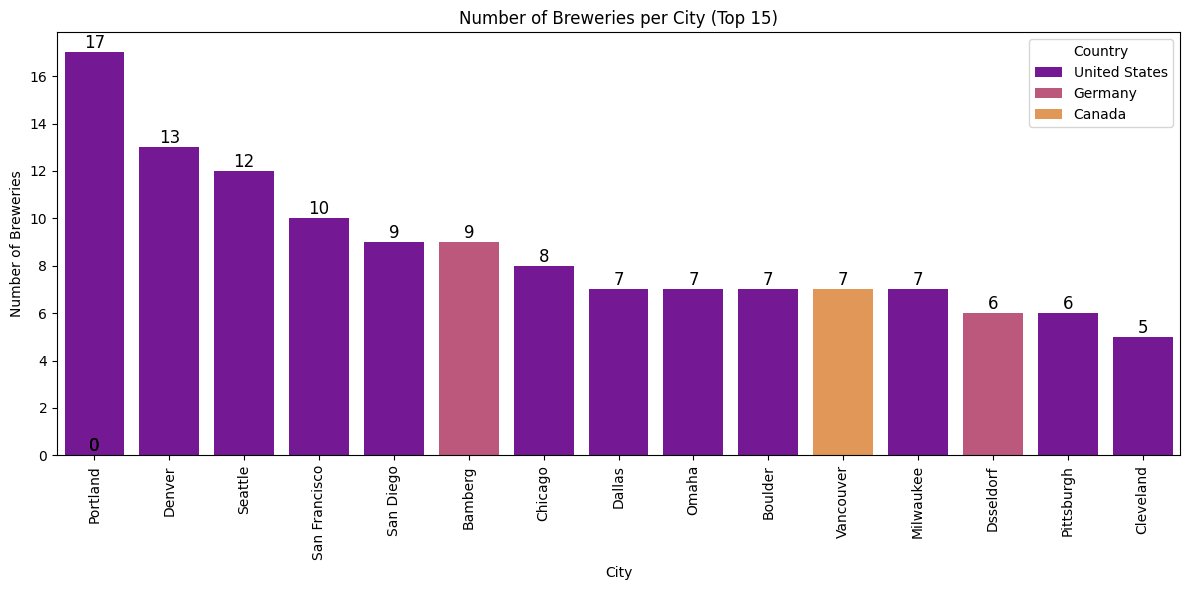

In [8]:
df_Cities_brewerys=df.groupby(['City','Country'])['brewery_id'].nunique().reset_index()
df_Cities_brewerys=df_Cities_brewerys.sort_values(by=['brewery_id'],ascending=False).head (hnum)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='City', y='brewery_id', data=df_Cities_brewerys, hue='Country', palette='plasma', legend=True)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title(f'Number of Breweries per City (Top {hnum})')
plt.xlabel('City')
plt.ylabel('Number of Breweries')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# **?כמה סוגים של בירה יש בכל מדינה**

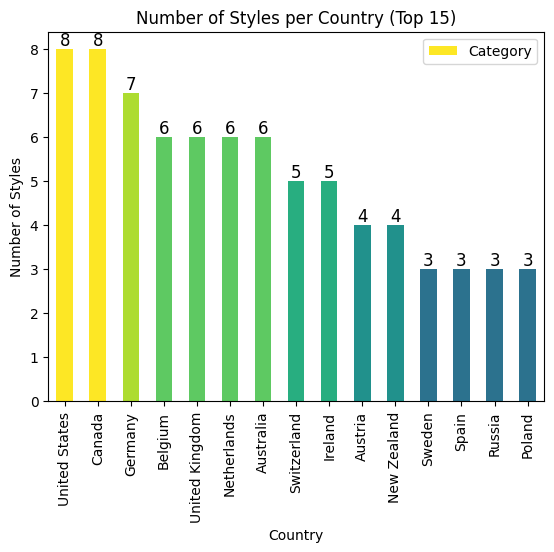

In [10]:
df_Category=df.groupby('Country')['Category'].nunique().reset_index()
df_Category=df_Category.sort_values(by=['Category'],ascending=False).head (hnum)
colors = plt.cm.viridis(df_Category['Category'] / df_Category['Category'].max())
df_Category.plot(kind='bar',x='Country',y='Category', color=colors, legend=True)
plt.title(f'Number of Styles per Country (Top {hnum})')
plt.xlabel('Country')
plt.ylabel('Number of Styles')
ax = plt.gca()  # Get the current Axes object
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

# **בירות הכי חזקות והכי חלשות**

In [12]:

columns_to_display = ['Name','Category', 'Style', 'Alcohol By Volume', 'Brewer', 'Country']
min_alcohol_content = df['Alcohol By Volume'].min()
filtered_df = df[['Name', 'Category','Style', 'Alcohol By Volume', 'Brewer', 'Country']].sort_values(by=['Alcohol By Volume'], ascending=False).head(hnum)
filtered_df1 = df.loc[df['Alcohol By Volume'] == min_alcohol_content, columns_to_display].head(hnum)
combinedf = pd.concat([filtered_df, filtered_df1], axis=0).reset_index(drop=True)
combinedf['Alcohol By Volume'] = combinedf['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
def color_row_by_alcohol(row):
    alcohol_content = float(row['Alcohol By Volume'].replace('%', ''))
    alcohol_content_max = float(combinedf['Alcohol By Volume'].max().replace('%', ''))
    normalized_alcohol = alcohol_content / alcohol_content_max
    color = plt.cm.plasma(normalized_alcohol)
    hex_color = '#%02x%02x%02x' % (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
    return [f'background-color: {hex_color}' for _ in row]
# combinedf['Alcohol By Volume'] = combinedf['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))

styled_df = combinedf.style.apply(color_row_by_alcohol, axis=1).set_properties(**{
    'color':'white',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'font-size': '12pt'
}).hide(axis='index')
display(styled_df)





Name,Category,Style,Alcohol By Volume,Brewer,Country
Norfolk Nog Old Dark Ale,British Ale,Old Ale,100.0%,Woodforde's Norfolk Ales,United Kingdom
Tactical Nuclear Penguin,North American Ale,American-Style Imperial Stout,32.0%,BrewDog Ltd,United Kingdom
Samuel Adams Utopias MMIV,nan,nan,24.0%,Boston Beer Company,United States
Raison D'Extra,North American Ale,Dark American-Belgo-Style Ale,20.0%,Dogfish Head Craft Brewery,United States
Tokyo*,North American Ale,American-Style Imperial Stout,18.2%,BrewDog Ltd,United Kingdom
Het Kapittel Pater,nan,nan,0.0%,Brouwerij Van Eecke,Belgium
Ale,nan,nan,0.0%,Bass Brewers,United Kingdom
Gouden Carolus NoÃ«l,nan,nan,0.0%,Brouwerij Het Anker,Belgium
KÃ¶lsch,nan,nan,0.0%,Clner Hofbrau Frh,Germany
Pils,nan,nan,0.0%,Gatz Brauhaus,Germany


# **מתאם בין מדינה לאחוז אלכוהול**

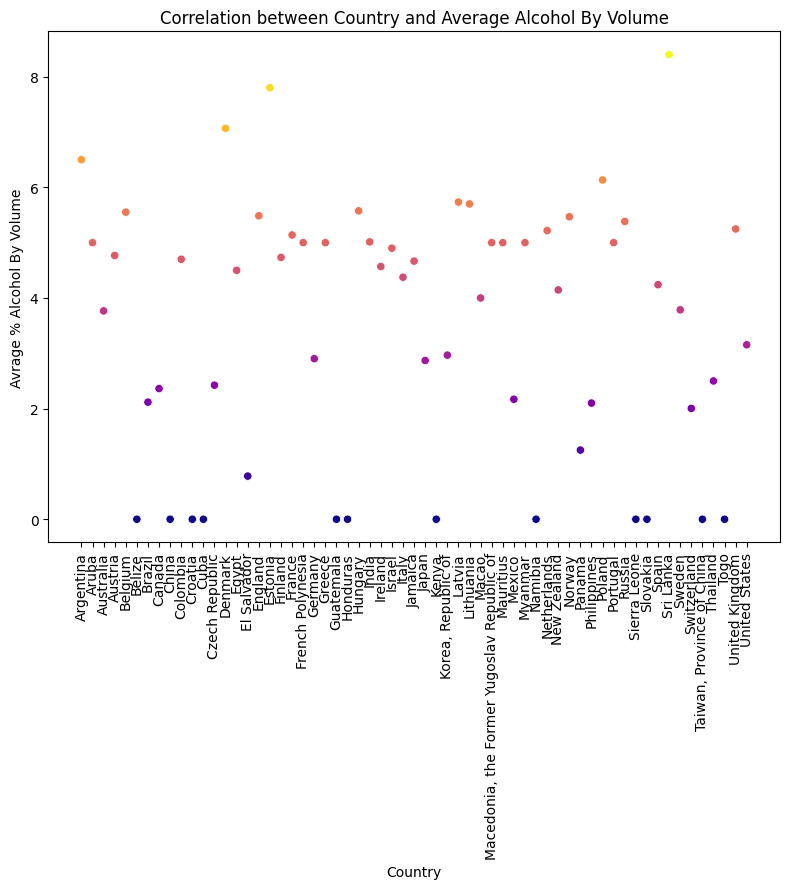

Correlation coefficient: -0.057


In [37]:

country_alcohol_df = df[['Country', 'Alcohol By Volume', 'International Bitterness Units']].groupby(['Country']).mean()
country_alcohol_df=country_alcohol_df.dropna(subset=['Alcohol By Volume', 'International Bitterness Units']).reset_index()
plt.figure(figsize=(8, 9))
sns.scatterplot(x='Country', y='Alcohol By Volume', data=country_alcohol_df,hue='Alcohol By Volume', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Country and Average Alcohol By Volume')
plt.xlabel('Country')
plt.ylabel('Avrage % Alcohol By Volume')
plt.tight_layout()
plt.show()

le = LabelEncoder()
country_alcohol_df['country_encoded'] = le.fit_transform(country_alcohol_df['Country'])
correlation = country_alcohol_df['country_encoded'].corr(country_alcohol_df['Alcohol By Volume'])
print(f"Correlation coefficient: {correlation:.3f}")




# **מתאם בין מדינה למרירות**

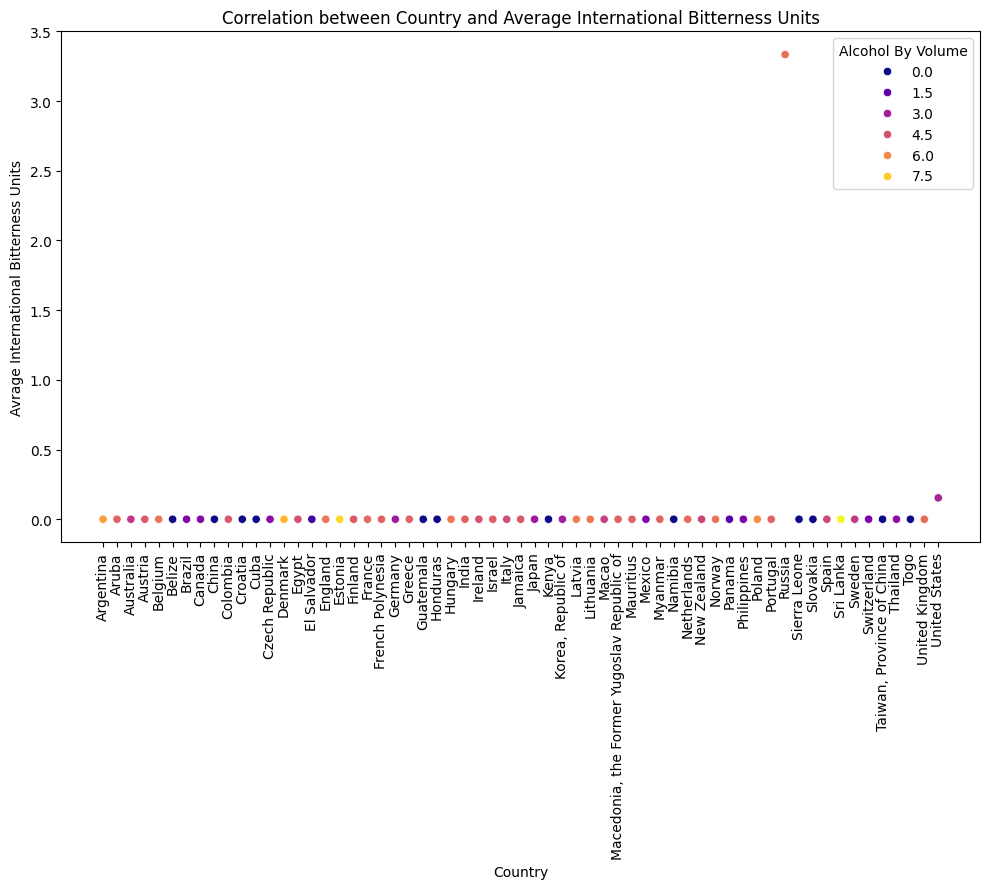

Correlation coefficient: 0.149


In [39]:
df_country_IBU = df[['Country', 'Alcohol By Volume', 'International Bitterness Units']].groupby(['Country'])[['International Bitterness Units','Alcohol By Volume']].mean()
df_country_IBU=df_country_IBU.dropna().reset_index()
plt.figure(figsize=(10, 9))
sns.scatterplot(x='Country', y='International Bitterness Units', data=df_country_IBU,hue='Alcohol By Volume', palette='plasma', legend=True)
plt.xticks(rotation=90)
plt.title('Correlation between Country and Average International Bitterness Units')
plt.xlabel('Country')
plt.ylabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()

le = LabelEncoder()
df_country_IBU['country_encoded'] = le.fit_transform(df_country_IBU['Country'])
correlation = df_country_IBU['country_encoded'].corr(df_country_IBU['International Bitterness Units'])
print(f"Correlation coefficient: {correlation:.3f}")

# correlation = df_country_IBU['International Bitterness Units'].corr(df_country_IBU.index.to_series())
# print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין מרירות לאחוז אלכוהול**

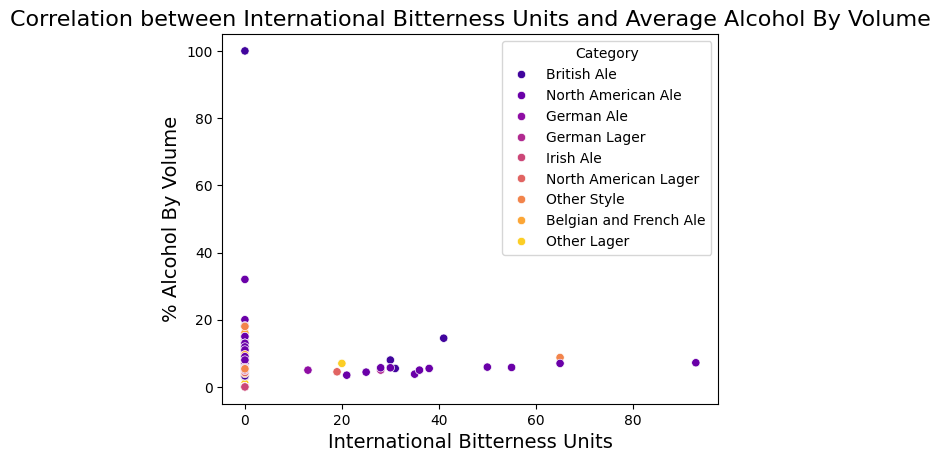

Correlation coefficient: 0.042


In [40]:
df_IBU_alcohol = df.dropna(subset=['Alcohol By Volume', 'International Bitterness Units'])
sns.scatterplot(y='Alcohol By Volume', x='International Bitterness Units', data=df_IBU_alcohol, hue='Category', palette='plasma')
plt.title('Correlation between International Bitterness Units and Average Alcohol By Volume', fontsize=16)
plt.xlabel('International Bitterness Units', fontsize=14)
plt.ylabel('% Alcohol By Volume', fontsize=14)
plt.show()

# le = LabelEncoder()
# style_IBU_df['Style_encoded'] = le.fit_transform(style_IBU_df['Style'])
# correlation = style_IBU_df['Style_encoded'].corr(style_IBU_df['International Bitterness Units'])
# print(f"Correlation coefficient: {correlation:.3f}")
correlation = df_IBU_alcohol['Alcohol By Volume'].corr(df_IBU_alcohol['International Bitterness Units'])
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סוג לאחוז אלכוהול**

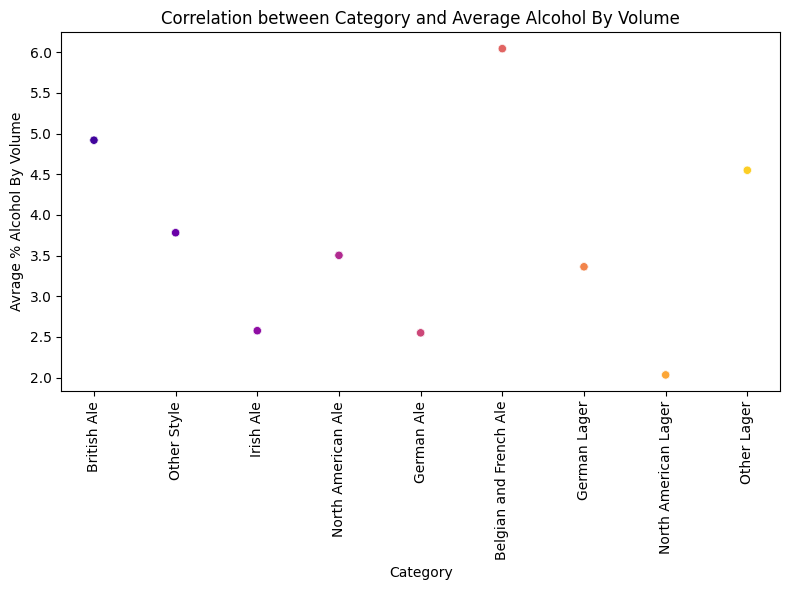

Correlation coefficient: -0.566


In [41]:
Category_alcohol_df = df[['cat_id', 'Alcohol By Volume']].groupby(['cat_id'])['Alcohol By Volume'].mean()
Category_alcohol_df=Category_alcohol_df.reset_index()
Category_alcohol_df=Category_alcohol_df.dropna(subset=['Alcohol By Volume', 'cat_id']).reset_index()
Category_alcohol_df = pd.merge(Category_alcohol_df, df[['cat_id', 'Category']], on='cat_id', how='left')
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='Category', y='Alcohol By Volume', data=Category_alcohol_df,hue='Category', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Category and Average Alcohol By Volume')
plt.xlabel('Category')
plt.ylabel('Avrage % Alcohol By Volume')
plt.tight_layout()
plt.show()

le = LabelEncoder()
Category_alcohol_df['category_encoded'] = le.fit_transform(Category_alcohol_df['Category'])
correlation = Category_alcohol_df['category_encoded'].corr(Category_alcohol_df['Alcohol By Volume'])
print(f"Correlation coefficient: {correlation:.3f}")



# **מתאם בין סוג למרירות**

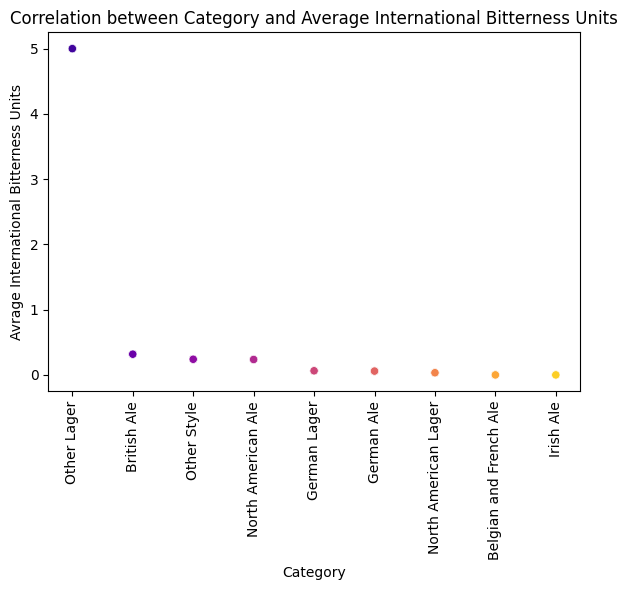

Correlation coefficient: -0.203


In [42]:
cat_IBU_df = df[['cat_id', 'International Bitterness Units']].groupby(['cat_id'])['International Bitterness Units'].mean()
cat_IBU_df=cat_IBU_df.reset_index()
cat_IBU_df=cat_IBU_df.dropna(subset=['International Bitterness Units', 'cat_id']).reset_index()
cat_IBU_df = pd.merge(cat_IBU_df, df[['cat_id', 'Category']], on='cat_id', how='left').sort_values(by=['International Bitterness Units'],ascending=False)
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Category', y='International Bitterness Units', data=cat_IBU_df,hue='Category', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Category and Average International Bitterness Units')
plt.xlabel('Category')
plt.ylabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()

le = LabelEncoder()
cat_IBU_df['category_encoded'] = le.fit_transform(cat_IBU_df['Category'])
correlation = cat_IBU_df['category_encoded'].corr(cat_IBU_df['International Bitterness Units'])
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סגנון הבירה לאחוז אלכוהול**

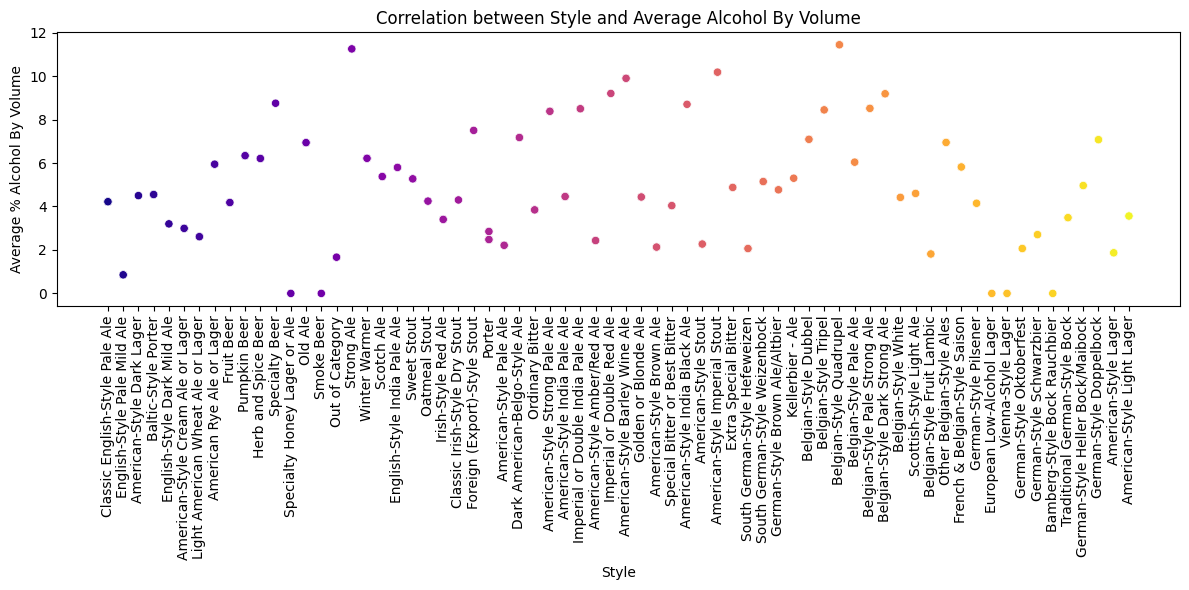

Correlation coefficient: 0.041


In [36]:
Style_alcohol_df = df[['style_id', 'Alcohol By Volume']].groupby(['style_id'])['Alcohol By Volume'].mean()
Style_alcohol_df = Style_alcohol_df.reset_index()
Style_alcohol_df = Style_alcohol_df.dropna(subset=['Alcohol By Volume', 'style_id']).reset_index()
Style_alcohol_df = pd.merge(Style_alcohol_df, df[['style_id', 'Style']], on='style_id', how='left')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Style', y='Alcohol By Volume', data=Style_alcohol_df, hue='Style', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Style and Average Alcohol By Volume')
plt.xlabel('Style')
plt.ylabel('Average % Alcohol By Volume')
plt.tight_layout()
plt.show()


le = LabelEncoder()
Style_alcohol_df['Style_encoded'] = le.fit_transform(Style_alcohol_df['Style'])
correlation = Style_alcohol_df['Style_encoded'].corr(Style_alcohol_df['Alcohol By Volume'])
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סוג בירה למרירות**

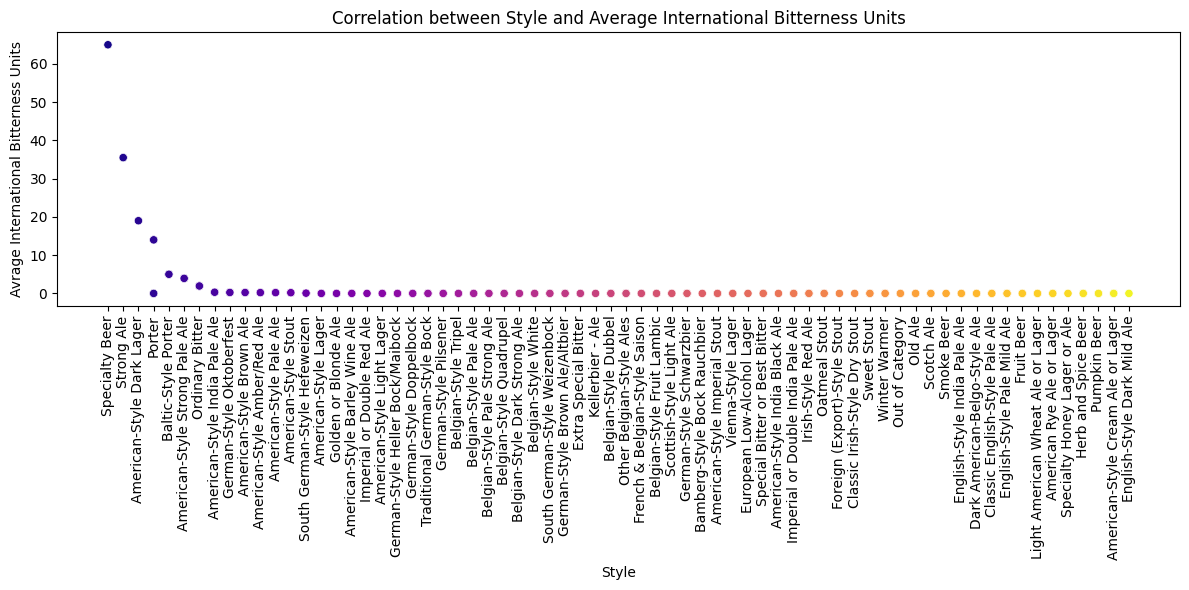

Correlation coefficient: -0.047


In [35]:
style_IBU_df = df[['style_id', 'International Bitterness Units']].groupby(['style_id'])['International Bitterness Units'].mean()
style_IBU_df=style_IBU_df.reset_index()
style_IBU_df=style_IBU_df.dropna(subset=['International Bitterness Units', 'style_id']).reset_index()
style_IBU_df = pd.merge(style_IBU_df, df[['style_id', 'Style']], on='style_id', how='left').sort_values(by=['International Bitterness Units'],ascending=False)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.scatterplot(x='Style', y='International Bitterness Units', data=style_IBU_df,hue='Style', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Style and Average International Bitterness Units')
plt.xlabel('Style')
plt.ylabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()

le = LabelEncoder()
style_IBU_df['Style_encoded'] = le.fit_transform(style_IBU_df['Style'])
correlation = style_IBU_df['Style_encoded'].corr(style_IBU_df['International Bitterness Units'])
print(f"Correlation coefficient: {correlation:.3f}")

# **?מה משפיע יותר על אחוז האלכוהול מדינת היצור או סוג הבירה**

Correlation coefficient between Category and Alcohol By Volume: -0.392
Correlation coefficient between Country and Alcohol By Volume: -0.057
סוג הבירה משפיע יותר על אחוז אלכוהול מאשר המדינה


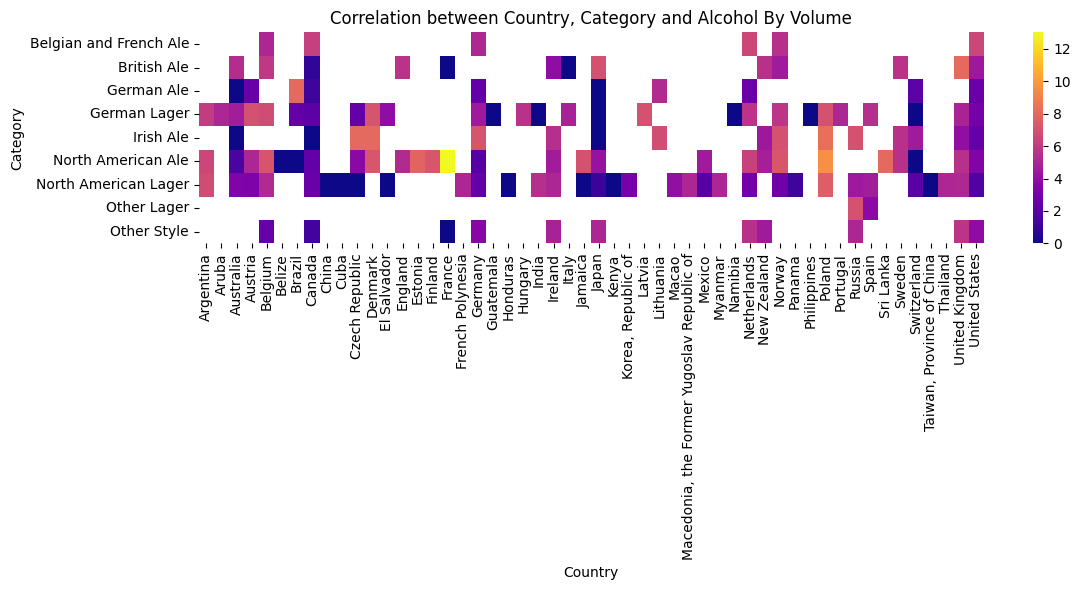

In [48]:

category_alcohol_df = df[['Category', 'Alcohol By Volume']].groupby(['Category'])['Alcohol By Volume'].mean()
category_alcohol_df = category_alcohol_df.reset_index()
category_alcohol_df = category_alcohol_df.dropna(subset=['Alcohol By Volume'])

country_alcohol_df = df[['Country', 'Alcohol By Volume']].groupby(['Country'])['Alcohol By Volume'].mean()
country_alcohol_df = country_alcohol_df.reset_index()
country_alcohol_df = country_alcohol_df.dropna(subset=['Alcohol By Volume'])

le = LabelEncoder()
category_alcohol_df['Category_encoded'] = le.fit_transform(category_alcohol_df['Category'])
country_alcohol_df['Country_encoded'] = le.fit_transform(country_alcohol_df['Country'])

correlation_category = category_alcohol_df['Alcohol By Volume'].corr(category_alcohol_df['Category_encoded'])
print(f"Correlation coefficient between Category and Alcohol By Volume: {correlation_category:.3f}")

correlation_country = country_alcohol_df['Alcohol By Volume'].corr(country_alcohol_df['Country_encoded'])
print(f"Correlation coefficient between Country and Alcohol By Volume: {correlation_country:.3f}")

if abs(correlation_category) > abs(correlation_country):
    print(f"\033[1m\033[32mסוג הבירה משפיע יותר על אחוז אלכוהול מאשר המדינה\033[0m")
else:
    print(f"\033[1m\033[32mהמדינה משפיעה יותר על אחוז אלכוהול מאשר הסוג\033[0m")

category_country_alcohol_df = df[['Category', 'Country', 'Alcohol By Volume']].groupby(['Category', 'Country'])['Alcohol By Volume'].mean().reset_index()
heatmap_data = category_country_alcohol_df.pivot(index='Category', columns='Country', values='Alcohol By Volume')


plt.figure(figsize=(12, 6))
sns.heatmap(data=heatmap_data, cmap='plasma')
plt.xticks(rotation=90)
plt.title('Correlation between Country, Category and Alcohol By Volume')
plt.xlabel('Country')
plt.ylabel('Category')

plt.tight_layout()
plt.show()


# **?מה משפיע יותר סוג הבירה או הסגנון**

Correlation coefficient between Category and Alcohol By Volume: -0.392
Correlation coefficient between Style and Alcohol By Volume: -0.099
סוג הבירה משפיע יותר על אחוז אלכוהול מאשר הסגנון


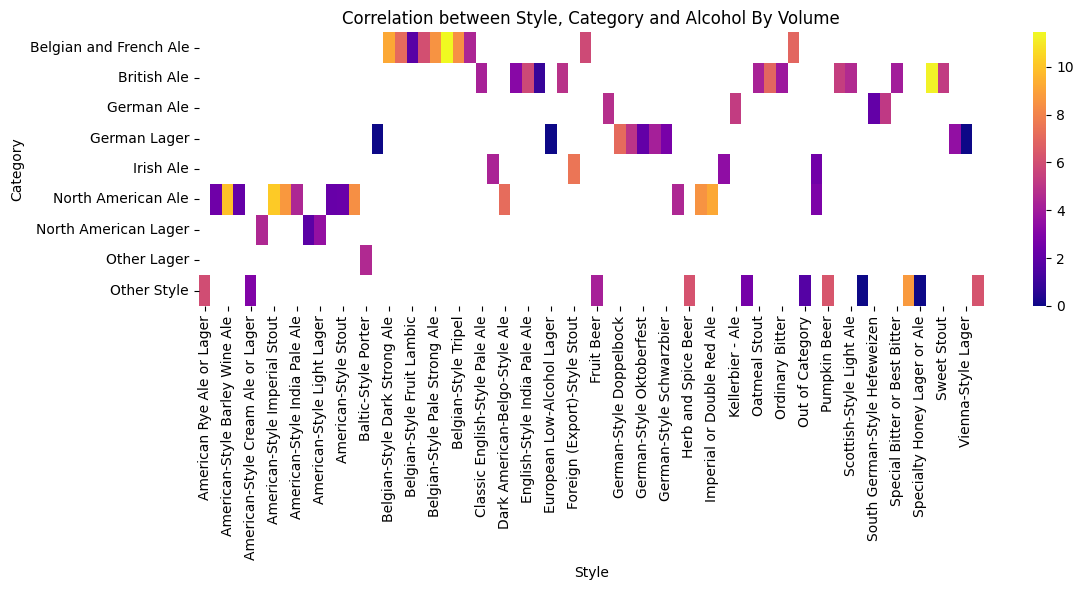

In [51]:
category_alcohol_df = df[['Category', 'Alcohol By Volume']].groupby(['Category'])['Alcohol By Volume'].mean()
category_alcohol_df = category_alcohol_df.reset_index()
category_alcohol_df = category_alcohol_df.dropna(subset=['Alcohol By Volume'])

style_alcohol_df = df[['Style', 'Alcohol By Volume']].groupby(['Style'])['Alcohol By Volume'].mean()
style_alcohol_df = style_alcohol_df.reset_index()
style_alcohol_df = style_alcohol_df.dropna(subset=['Alcohol By Volume'])


le = LabelEncoder()
category_alcohol_df['Category_encoded'] = le.fit_transform(category_alcohol_df['Category'])
style_alcohol_df['Style_encoded'] = le.fit_transform(style_alcohol_df['Style'])

correlation_category = category_alcohol_df['Alcohol By Volume'].corr(category_alcohol_df['Category_encoded'])
print(f"Correlation coefficient between Category and Alcohol By Volume: {correlation_category:.3f}")

correlation_style = style_alcohol_df['Alcohol By Volume'].corr(style_alcohol_df['Style_encoded'])
print(f"Correlation coefficient between Style and Alcohol By Volume: {correlation_style:.3f}")




if abs(correlation_category) > abs(correlation_style):
    print (f"\033[1m\033[32mסוג הבירה משפיע יותר על אחוז אלכוהול מאשר הסגנון\033[0m")
else:
    print (f"\033[1m\033[32הסגנון משפיע יותר על אחוז אלכוהול מאשר הסוג\033[0m")

category_style_alcohol_df = df[['Category', 'Style', 'Alcohol By Volume']].groupby(['Category', 'Style'])['Alcohol By Volume'].mean().reset_index()
heatmap_data = category_style_alcohol_df.pivot(index='Category', columns='Style', values='Alcohol By Volume')


plt.figure(figsize=(12, 6))
sns.heatmap(data=heatmap_data, cmap='plasma')
plt.xticks(rotation=90)
plt.title('Correlation between Style, Category and Alcohol By Volume')
plt.xlabel('Style')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# **חישוב השפעה משותפת למדינה וסוג**

Model Coefficients:
  Variable 1: -0.436
  Variable 2: 0.031
  Variable 3: 0.406
  Variable 4: 0.031
  Variable 5: 0.406
  Variable 6: -0.436

R^2: 0.610


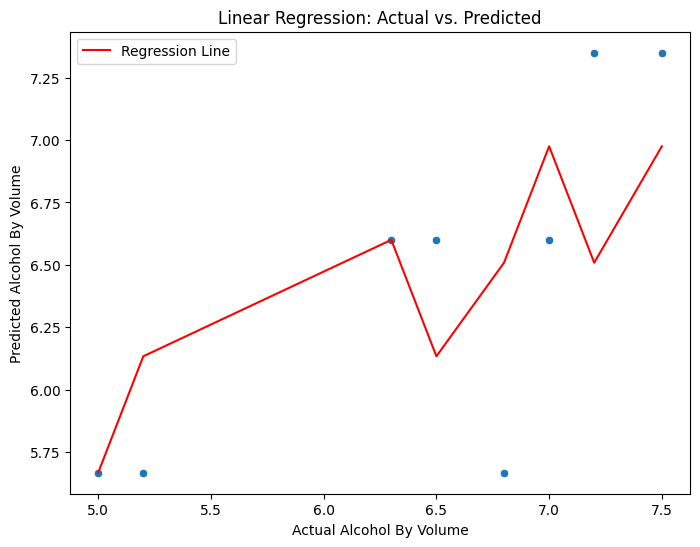

In [20]:
# One-Hot Encoding for categorical variables
df_notnull = df.dropna(subset=['Alcohol By Volume'])
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Specify sparse=False
encoded_features = encoder.fit_transform(df_notnull[['Category', 'Country']])
encoded_df = pd.DataFrame(encoded_features)
X = encoded_df
y = df_notnull['Alcohol By Volume']

# Train linear model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"  Variable {i+1}: {coef:.3f}")

# Calculate R^2
r2 = model.score(X, y)
print(f"\nR^2: {r2:.3f}")

# Predict values
y_pred = model.predict(X)

# Generate combinations of categories and countries
all_categories = df['Category'].unique()
all_countries = df['Country'].unique()
all_combinations = list(product(all_categories, all_countries))

# Create a DataFrame with the combinations
combination_df = pd.DataFrame(all_combinations, columns=['Category', 'Country'])

# Predict values for the combinations
X_combinations = encoder.transform(combination_df)
y_line = model.predict(X_combinations)

# Reset the index of y and then sort
y_with_index = y.reset_index(drop=True)
sorted_indices = np.argsort(y_with_index)
y_sorted = y_with_index[sorted_indices]
y_line_sorted = y_line[sorted_indices]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Alcohol By Volume")
plt.ylabel("Predicted Alcohol By Volume")
plt.title("Linear Regression: Actual vs. Predicted")

# Plot the sorted regression line
plt.plot(y_sorted, y_line_sorted, color='red', label="Regression Line")

plt.legend()
plt.show()

# **מנוע חיפוש בירות ומבשלות**

 [RateBeer](https://www.ratebeer.com/)